In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
from scipy.optimize import minimize
from solvers import *
import scipy.stats as st

## Logistic Regression

In [113]:
d = 50
N = 1000

A = np.random.uniform(low=-1.0, high=1.0, size=[d,N])
xstar = 0.5 * np.ones(d)
eps = np.random.uniform(low=-0.5, high=0.5, size=N)
y = np.sign(A.T.dot(xstar) + eps) #np.sign(A.T @ xstar + eps)

def phi(t):
    return np.log(1 + np.exp(-t))

f = lambda x: (1/N)*np.sum(phi(A.T.dot(x) * y.T))#np.sum(np.log(1 + np.exp(-y * (A.T @ x)))) / N

x0 = np.zeros(d)
fopt = minimize(f, x0, options={'gtol': 1e-8}).fun


In [114]:
num_iters = 5000
num_trials = 200
r = 0.1
residual_matrix = np.zeros([num_trials,num_iters+1])
hlf_matrix = np.zeros([num_trials,num_iters+1])
tp_matrix = np.zeros([num_trials,num_iters+1])


for k in tqdm(range(num_trials)):
    fvals, _ = HFSZOSolver(eta=4.5e-2, r=r).solve(f=f, x0=x0, iterations=num_iters)
    residual_matrix[k,:] = fvals
    
residual_trace = np.mean(residual_matrix, axis=0)


for k in tqdm(range(num_trials)):
    fvals, _ = HLFSZOSolver(eta=1.5e-2, r=r).solve(f=f, x0=x0, iterations=num_iters)
    hlf_matrix[k,:] = fvals
    
hlf_trace = np.mean(hlf_matrix, axis=0)


for k in tqdm(range(num_trials)):
    fvals, _ = TPSZOSolver(eta=0.7, r=r).solve(f=f, x0=x0, iterations=num_iters)
    tp_matrix[k,:] = fvals
    
tp_trace = np.mean(tp_matrix, axis=0)

100%|█████████████████████████████████████████| 200/200 [03:44<00:00,  1.12s/it]


In [115]:
lowCI_residual = np.zeros(num_iters+1)
highCI_residual = np.zeros(num_iters+1)
lowCI_hlf = np.zeros(num_iters+1)
highCI_hlf = np.zeros(num_iters+1)
lowCI_tp = np.zeros(num_iters+1)
highCI_tp = np.zeros(num_iters+1)
for k in range(num_iters):
    lowCI_residual[k], highCI_residual[k] = st.norm.interval(alpha=0.80, loc=residual_trace[k+1], scale=(np.sqrt(num_trials))*st.sem(residual_matrix[:,k+1]))
    lowCI_hlf[k], highCI_hlf[k] = st.norm.interval(alpha=0.80, loc=hlf_trace[k+1], scale=(np.sqrt(num_trials))*st.sem(hlf_matrix[:,k+1]))
    lowCI_tp[k], highCI_tp[k] = st.norm.interval(alpha=0.80, loc=tp_trace[k+1], scale=(np.sqrt(num_trials))*st.sem(tp_matrix[:,k+1]))
lowCI_residual[-1] = lowCI_residual[-2]
highCI_residual[-1] = highCI_residual[-2]
lowCI_hlf[-1] = lowCI_hlf[-2]
highCI_hlf[-1] = highCI_hlf[-2]
lowCI_tp[-1] = lowCI_tp[-2]
highCI_tp[-1] = highCI_tp[-2]

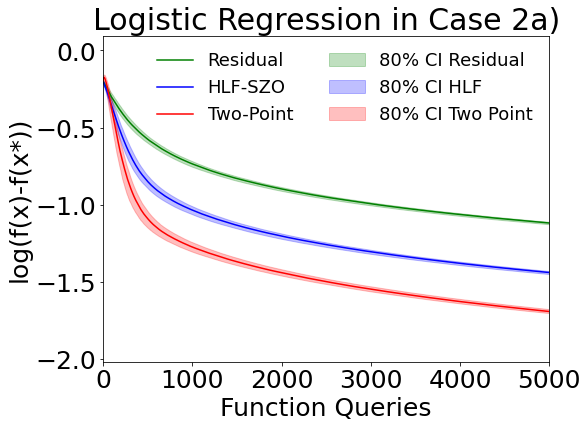

In [124]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)
plt.figure(figsize=(8, 6))
plt.title('Logistic Regression in Case 2a)')
plt.plot(0,0)
plt.plot(np.log10(residual_trace - fopt), label='Residual', color='green')
plt.plot(np.log10(hlf_trace - fopt), label='HLF-SZO',color='blue')
plt.plot(range(0,2*(num_iters+1),2),np.log10(tp_trace - fopt), label='Two-Point',color='red')
plt.fill_between(range(0,num_iters+1,1), np.log10(lowCI_residual - fopt), np.log10(highCI_residual - fopt), color='green', alpha=0.25, label="80% CI Residual")
plt.fill_between(range(0,num_iters+1,1), np.log10(lowCI_hlf - fopt), np.log10(highCI_hlf - fopt), color='blue', alpha=0.25, label="80% CI HLF")
plt.fill_between(range(0,2*(num_iters+1),2), np.log10(lowCI_tp - fopt), np.log10(highCI_tp - fopt), color='red', alpha=0.25, label="80% CI Two Point")
plt.xlabel("Function Queries")
plt.ylabel("log(f(x)-f(x*))")
plt.legend(ncol=2, fontsize=18,frameon=False)
plt.xlim(0, 5000)
plt.savefig("fig4a.pdf",bbox_inches='tight')
plt.show()

## Ridge Regression

In [2]:
N = 1000
d = 50
H = np.random.randn(N, d)
xstar = 0.5 * np.ones(d)
c = 0.1
eps = np.sqrt(0.1) * np.random.randn(N)
b = H @ xstar + eps

f = lambda x: 1/2 * np.linalg.norm(b - H @ x)**2 + c/2 * np.linalg.norm(x)**2

x0 = np.zeros(d)
fopt = minimize(f, x0, options={'gtol': 1e-8}).fun

In [3]:
num_iters = 5000
num_trials = 200
r = 0.1
residual_matrix = np.zeros([num_trials,num_iters+1])
hlf_matrix = np.zeros([num_trials,num_iters+1])
tp_matrix = np.zeros([num_trials,num_iters+1])


for k in tqdm(range(num_trials)):
    fvals, _ = HFSZOSolver(eta=2.4e-6, r=r).solve(f=f, x0=x0, iterations=num_iters)
    residual_matrix[k,:] = fvals
    
residual_trace = np.mean(residual_matrix, axis=0)


for k in tqdm(range(num_trials)):
    fvals, _ = HLFSZOSolver(eta=1e-6, r=r).solve(f=f, x0=x0, iterations=num_iters)
    hlf_matrix[k,:] = fvals
    
hlf_trace = np.mean(hlf_matrix, axis=0)


for k in tqdm(range(num_trials)):
    fvals, _ = TPSZOSolver(eta=2e-5, r=r).solve(f=f, x0=x0, iterations=num_iters)
    tp_matrix[k,:] = fvals
    
tp_trace = np.mean(tp_matrix, axis=0)

100%|█████████████████████████████████████████| 200/200 [01:50<00:00,  1.81it/s]


In [14]:
lowCI_residual = np.zeros(num_iters+1)
highCI_residual = np.zeros(num_iters+1)
lowCI_hlf = np.zeros(num_iters+1)
highCI_hlf = np.zeros(num_iters+1)
lowCI_tp = np.zeros(num_iters+1)
highCI_tp = np.zeros(num_iters+1)
for k in range(num_iters):
    lowCI_residual[k], highCI_residual[k] = st.norm.interval(alpha=0.80, loc=residual_trace[k+1], scale=(np.sqrt(num_trials))*st.sem(residual_matrix[:,k+1]))
    lowCI_hlf[k], highCI_hlf[k] = st.norm.interval(alpha=0.80, loc=hlf_trace[k+1], scale=(np.sqrt(num_trials))*st.sem(hlf_matrix[:,k+1]))
    lowCI_tp[k], highCI_tp[k] = st.norm.interval(alpha=0.80, loc=tp_trace[k+1], scale=(0.4*np.sqrt(num_trials))*st.sem(tp_matrix[:,k+1]))
lowCI_residual[-1] = lowCI_residual[-2]
highCI_residual[-1] = highCI_residual[-2]
lowCI_hlf[-1] = lowCI_hlf[-2]
highCI_hlf[-1] = highCI_hlf[-2]
lowCI_tp[-1] = lowCI_tp[-2]
highCI_tp[-1] = highCI_tp[-2]

/tmp/ipykernel_55991/1918687916.py:10: RuntimeWarning: invalid value encountered in log10
  plt.plot(range(0,2*(num_iters+1),2),np.log10(tp_trace - fopt), label='Two-Point',color='red')
/tmp/ipykernel_55991/1918687916.py:14: RuntimeWarning: invalid value encountered in log10
  plt.fill_between(range(0,2*(num_iters+1),2), np.log10(lowCI_tp - fopt), np.log10(highCI_tp - fopt), color='red', alpha=0.25, label="80% CI Two Point")


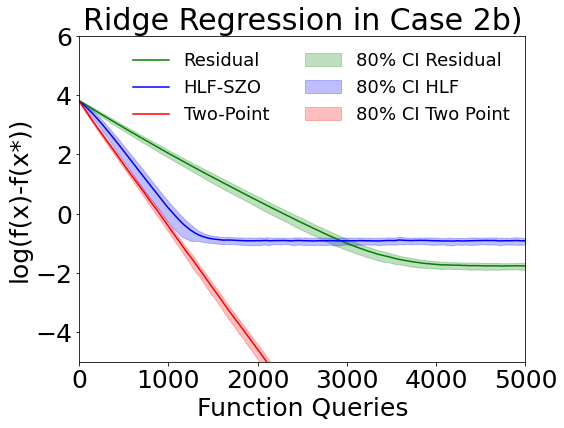

In [16]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)
plt.figure(figsize=(8, 6))
plt.title('Ridge Regression in Case 2b)')
plt.plot(np.log10(residual_trace - fopt), label='Residual', color='green')
plt.plot(np.log10(hlf_trace - fopt), label='HLF-SZO',color='blue')
plt.plot(range(0,2*(num_iters+1),2),np.log10(tp_trace - fopt), label='Two-Point',color='red')
plt.plot(0,6)
plt.fill_between(range(num_iters+1), np.log10(lowCI_residual - fopt), np.log10(highCI_residual - fopt), color='green', alpha=0.25, label="80% CI Residual")
plt.fill_between(range(num_iters+1), np.log10(lowCI_hlf - fopt), np.log10(highCI_hlf - fopt), color='blue', alpha=0.25, label="80% CI HLF")
plt.fill_between(range(0,2*(num_iters+1),2), np.log10(lowCI_tp - fopt), np.log10(highCI_tp - fopt), color='red', alpha=0.25, label="80% CI Two Point")
plt.xlabel("Function Queries")
plt.ylabel("log(f(x)-f(x*))")
plt.xlim(0, 5000)
plt.ylim(-5, 6)
plt.legend(ncol=2,loc='upper right', fontsize=18,frameon=False)
plt.savefig("fig4b.pdf",bbox_inches='tight')
plt.show()

## Beale Function

In [17]:
d = 2
f = lambda x: (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

x0 = np.zeros(d)
# fopt = minimize(f, x0, options={'gtol': 1e-8}).fun
fopt = 0

In [18]:
num_iters = 5000
num_trials = 200
r = 0.01
residual_matrix = np.zeros([num_trials,num_iters+1])
hlf_matrix = np.zeros([num_trials,num_iters+1])
tp_matrix = np.zeros([num_trials,num_iters+1])


for k in tqdm(range(num_trials)):
    fvals, _ = HFSZOSolver(eta=5.8e-4, r=r).solve(f=f, x0=x0, iterations=num_iters)
    residual_matrix[k,:] = fvals
    
residual_trace = np.mean(residual_matrix, axis=0)


for k in tqdm(range(num_trials)):
    fvals, _ = HLFSZOSolver(eta=2e-4, r=r).solve(f=f, x0=x0, iterations=num_iters)
    hlf_matrix[k,:] = fvals
    
hlf_trace = np.mean(hlf_matrix, axis=0)


for k in tqdm(range(num_trials)):
    fvals, _ = TPSZOSolver(eta=6e-3, r=r).solve(f=f, x0=x0, iterations=num_iters)
    tp_matrix[k,:] = fvals
    
tp_trace = np.mean(tp_matrix, axis=0)

100%|█████████████████████████████████████████| 200/200 [00:14<00:00, 13.87it/s]


In [19]:
lowCI_residual = np.zeros(num_iters+1)
highCI_residual = np.zeros(num_iters+1)
lowCI_hlf = np.zeros(num_iters+1)
highCI_hlf = np.zeros(num_iters+1)
lowCI_tp = np.zeros(num_iters+1)
highCI_tp = np.zeros(num_iters+1)
for k in range(num_iters):
    lowCI_residual[k], highCI_residual[k] = st.norm.interval(alpha=0.80, loc=residual_trace[k+1], scale=(np.sqrt(num_trials))*st.sem(residual_matrix[:,k+1]))
    lowCI_hlf[k], highCI_hlf[k] = st.norm.interval(alpha=0.80, loc=hlf_trace[k+1], scale=(np.sqrt(num_trials))*st.sem(hlf_matrix[:,k+1]))
    lowCI_tp[k], highCI_tp[k] = st.norm.interval(alpha=0.80, loc=tp_trace[k+1], scale=(np.sqrt(num_trials))*st.sem(tp_matrix[:,k+1]))
lowCI_residual[-1] = lowCI_residual[-2]
highCI_residual[-1] = highCI_residual[-2]
lowCI_hlf[-1] = lowCI_hlf[-2]
highCI_hlf[-1] = highCI_hlf[-2]
lowCI_tp[-1] = lowCI_tp[-2]
highCI_tp[-1] = highCI_tp[-2]

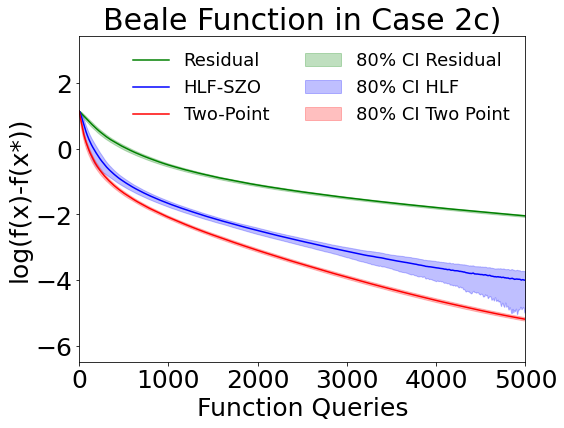

In [23]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)
plt.figure(figsize=(8, 6))

plt.title('Beale Function in Case 2c)')
plt.plot(np.log10(residual_trace - fopt), label='Residual', color='green')
plt.plot(np.log10(hlf_trace - fopt), label='HLF-SZO',color='blue')
plt.plot(range(0,2*(num_iters+1),2),np.log10(tp_trace - fopt), label='Two-Point',color='red')
plt.plot(0,3)
plt.fill_between(range(num_iters+1), np.log10(lowCI_residual - fopt), np.log10(highCI_residual - fopt), color='green', alpha=0.25, label="80% CI Residual")
plt.fill_between(range(num_iters+1), np.log10(lowCI_hlf - fopt), np.log10(highCI_hlf - fopt), color='blue', alpha=0.25, label="80% CI HLF")
plt.fill_between(range(0,2*(num_iters+1),2), np.log10(lowCI_tp - fopt), np.log10(highCI_tp - fopt), color='red', alpha=0.25, label="80% CI Two Point")
plt.xlabel("Function Queries")
plt.ylabel("log(f(x)-f(x*))")
plt.legend(ncol=2,fontsize=18,frameon=False)
plt.xlim(0, 5000)
#plt.ylim(-5, 6)
plt.savefig("fig4c.pdf",bbox_inches='tight')
plt.show()

## Two-Layer NN

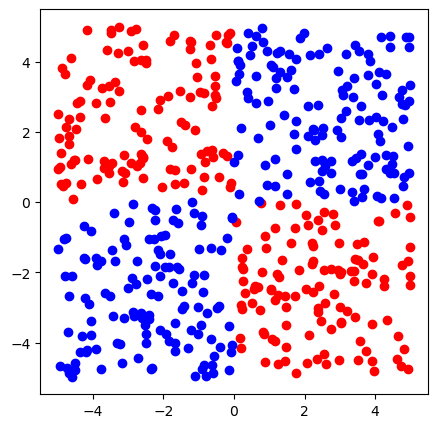

In [58]:
# Noiseless quadrant dataset
D = 2
N = 500
X = 10 * np.random.rand(N, D) - 5
y = np.prod(np.sign(X), axis=1)

plt.figure(figsize=(5, 5))
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='red', label='-1')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='1')

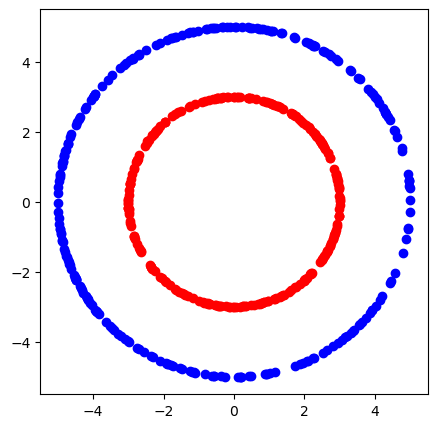

In [64]:
# Noisy radial dataset
r1, r2 = 3, 5
D = 2
N = 500
y = np.random.choice([-1, 1], size=N)
X = np.random.randn(N, D)
X /= np.linalg.norm(X, axis=1)[:, np.newaxis]

X[y==-1, :] *= r1
X[y==1, :] *= r2

plt.figure(figsize=(5, 5))
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='red', label='-1')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='1')

In [65]:
# Define network
relu = lambda x: np.maximum(x, 0)
m = 4
d = m*D + 2*m + 1 # Number of parameters

def c_matrix(W1, W2, b1, b2, data):
    return relu(data @ W1.T + b1) @ W2.T / np.sqrt(m) + b2

def c(x, data):
    W1 = x[:m*D].reshape(m, D)
    W2 = x[m*D:m*D+m]
    b1 = x[m*D+m:m*D+2*m]
    b2 = x[-1]
    
    return c_matrix(W1, W2, b1, b2, data)

x0 = np.random.randn(d)

f = lambda x: np.sum(np.log(1 + np.exp(-y * c(x, data=X)))) / N

In [66]:
np.mean(y == np.sign(c(x0, data=X)))

0.522

In [67]:
num_iters = 50000
r = 0.1

total = np.zeros(num_iters+1)
fvals, x = TPSZOSolver(eta=1e-2, r=r, show_progress=True).solve(f=f, x0=x0, iterations=num_iters)

100%|███████████████████████████████████| 50000/50000 [00:07<00:00, 6319.63it/s]


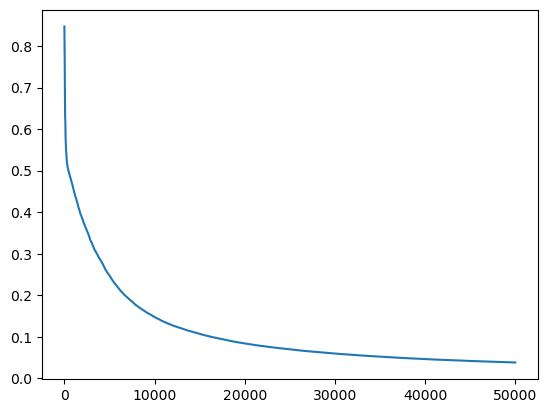

In [68]:
plt.plot(fvals)

In [69]:
np.mean(y == np.sign(c(x, data=X)))

1.0